### Implementing the Gradient Descent algorithm from scratch


Jacob L. Fine

April 14, 2024

We are often interested in finding the global/local minima of multivariate functions whose coordinates are difficult to find analytically. The basic idea of gradient descent is to select a random point, and iteratively adjust its value in the direction of the gradient at that point, until the gradient is a stationary point. In the example below, the stationary point identified corresponds to the global minimum of the objective function which is the equation x^2 + y^2. 

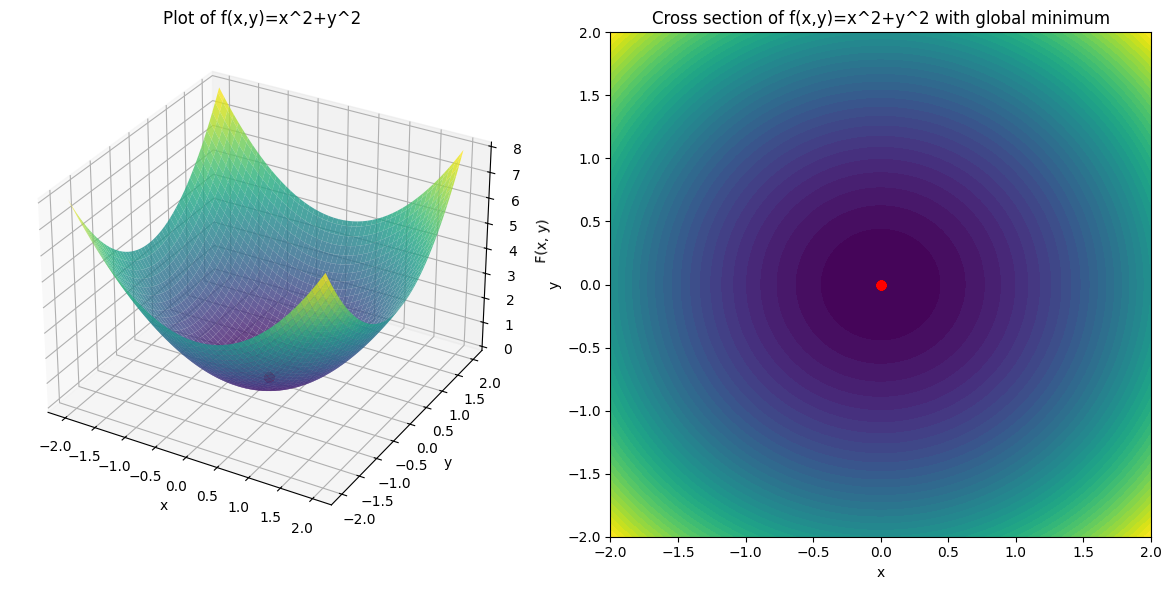

F(x_final,y_final) = 2.4147349876646916e-13
(x_final,y_final) = [-4.66182527e-07  1.55394176e-07]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# We first define the function
def objective_function(x, y):
    return x**2 + y**2

# Define the gradient of the objective function, which is simply the vector of partial derivatives with respect to x and y
def gradient_objective_function(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# We now implement the gradient descent algorithm, which updates the guesses of the argmin of the objective function based on 
# the learning rate and current gradient. We therefore find the gradient at each point, and update the parameters x and y by subtracting
# the product of the gradient and learning rate, that is, [x,y] = [x_0,y_0] - learning_rate * gradient(x_0,y_0). 
# We anticipate that F(x,y) will decrease after each iteration until the minimum of the function, where the final values of x, y are the argmin.
def gradient_descent(gradient_function, initial_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    # the first point is some guess
    point = initial_point.astype(float)  

    # we will add points to the path, to keep track of the guesses of argmin
    path = [point]  
    # the iteration starts at zero
    iteration = 0
    # only when the iteration is not the largest
    while iteration < max_iterations:
        # we use the gradient function defined earlier to compute the gradient at the point
        gradient = gradient_function(*point)

        # we also compute the magninute of the gradient, to make sure it is not 'effectively' 0 indicating a stationary point
        if np.linalg.norm(gradient) < tolerance:
            # we break if we are at a stationary point
            break  

        # the gradient descent equation to update our guesses of the point
        point -= learning_rate * gradient
        # keeps track of the points for guesses of argmin
        path.append(point)
        
        # updates the iteration
        iteration += 1
    return np.array(path)

# the initial guess of argmin
initial_guess_objective_function = np.array([-3.0, 1.0], dtype=float)

# applies the gradient descent algorithm
optimal_path_objective_function = gradient_descent(gradient_objective_function, initial_guess_objective_function)

# initializes the plots
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

# plots the objective function in 3d space
x_objective_function = np.linspace(-2, 2, 100)
y_objective_function = np.linspace(-2, 2, 100)
X_objective_function, Y_objective_function = np.meshgrid(x_objective_function, y_objective_function)
Z_objective_function = objective_function(X_objective_function, Y_objective_function)

ax1.plot_surface(X_objective_function, Y_objective_function, Z_objective_function, cmap='viridis', alpha=0.8)
ax1.plot(optimal_path_objective_function[:, 0], optimal_path_objective_function[:, 1], objective_function(optimal_path_objective_function[:, 0], optimal_path_objective_function[:, 1]), 'ro-')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('F(x, y)')
ax1.set_title('Plot of f(x,y)=x^2+y^2')

# Adds another plot for the cross section of the objective function
ax2 = fig.add_subplot(122)
ax2.contourf(X_objective_function, Y_objective_function, Z_objective_function, levels=50, cmap='viridis')
ax2.plot(optimal_path_objective_function[:, 0], optimal_path_objective_function[:, 1], 'ro-')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Cross section of f(x,y)=x^2+y^2 with global minimum')

plt.tight_layout()
plt.show()

# the final point in the path is the estimated argmin
optimal_point_objective_function = optimal_path_objective_function[-1]

# the final of F(x,y) from the final estimate of argmin
optimal_value_objective_function = objective_function(*optimal_point_objective_function)

print(f"F(x_final,y_final) = {optimal_value_objective_function}")
print(f"(x_final,y_final) = {optimal_point_objective_function}")



As has been shown, we have found as estimate of the global minimum at (0,0) using the gradient descent algorithm.